In [40]:
# Importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [41]:
import warnings
warnings.filterwarnings('ignore')

In [42]:
#importing csv dataset

df = pd.read_csv('C:\\Users\\Dell\\Practice project\\Advertising Sales Channel Prediction\\Advertising.csv')
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [95]:
#Data inspection

In [43]:
df.shape

(200, 4)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [96]:
# there is no Nan or missiing values in dataaset

In [45]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [98]:
# huge spending on TV advertising on an average 147,000 and minimum on radio of 23,000

In [101]:
# Data cleaning

In [46]:
# checking for null values

df.isna().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

<AxesSubplot:>

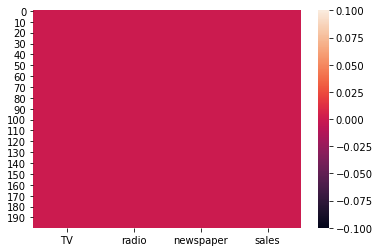

In [47]:
sns.heatmap(df.isnull())

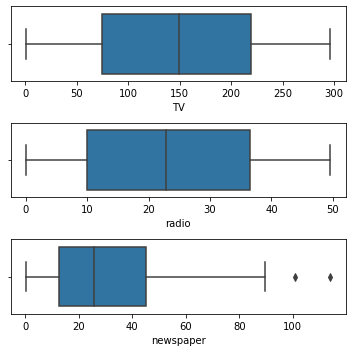

In [48]:
# outlier analysis
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(df['TV'], ax= axs[0])
plt2 = sns.boxplot(df['radio'], ax = axs[1])
plt3 = sns.boxplot(df['newspaper'], ax= axs[2])
plt.tight_layout()

In [102]:
#no outliers present in data

In [103]:
# explonatory data analysis

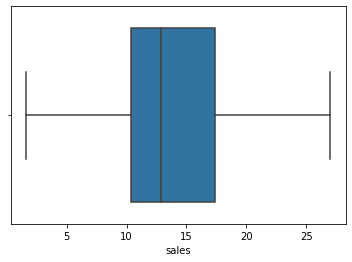

In [49]:
# target variable
sns.boxplot(df['sales'])
plt.show()

In [104]:
# There is no outlier present in target sales
# average sales of about 15,000

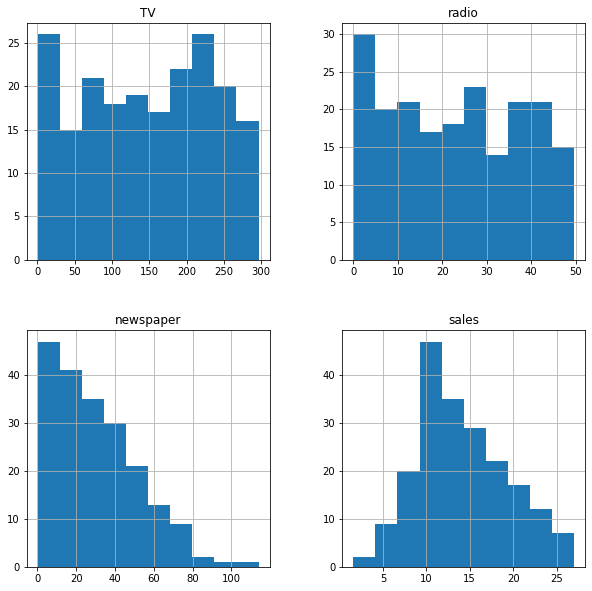

In [106]:
# checking all variables

df.hist(bins=10, figsize = (10,10))
plt.show()

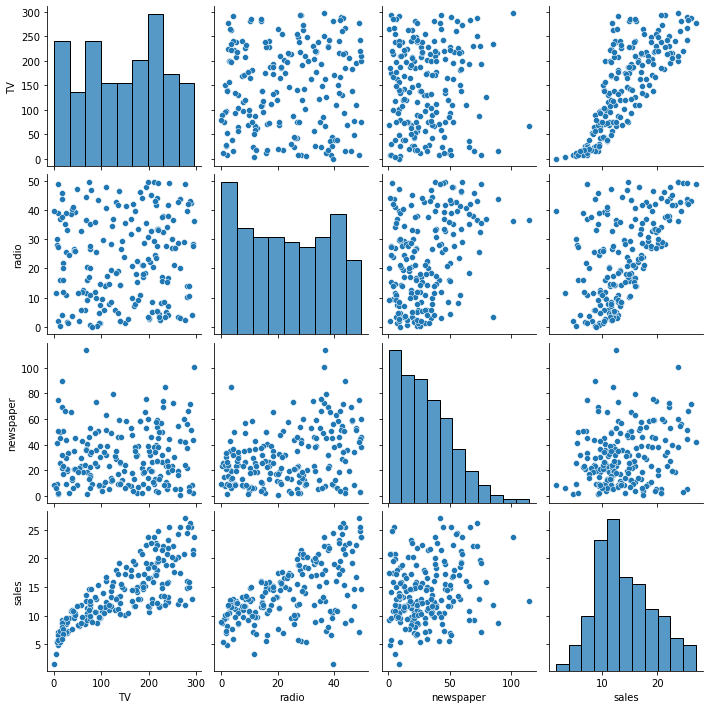

In [105]:
sns.pairplot(df, size=2.5)
plt.show()

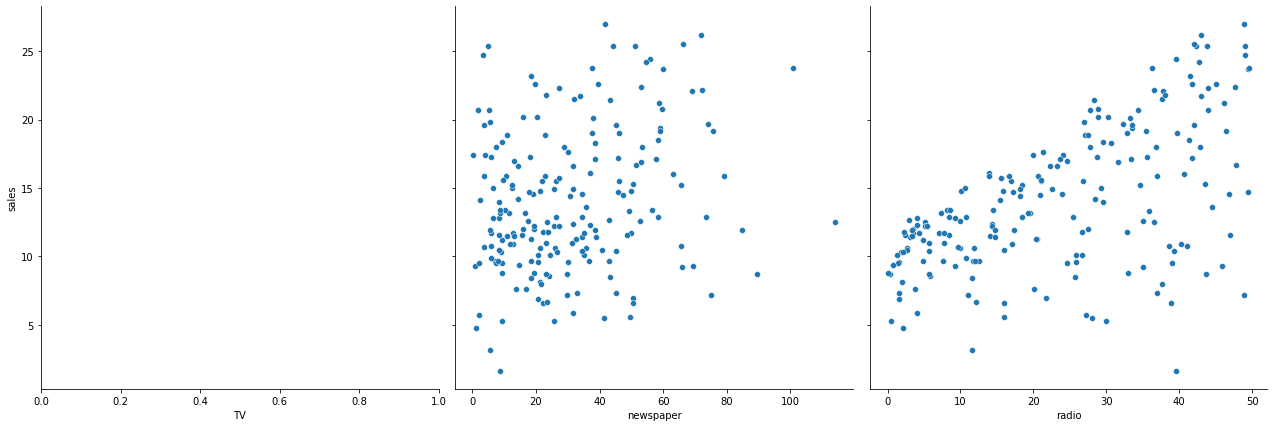

In [62]:
sns.pairplot(df, x_vars=['TV', 'newspaper', 'radio'], y_vars = 'sales', height=6, aspect=1, kind='scatter')
plt.show()

In [107]:
#target sale is correlated with tv and some what to radio but there is no corelation with newspaper.
# seems there is no correlation between all features.

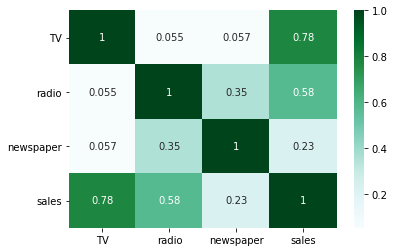

In [66]:
#checking correlation 
sns.heatmap(df.corr(), cmap='BuGn', annot = True)
plt.show()

In [108]:
# TV variable is correlated with sales

In [68]:
#data preprocessing

x = df['TV']
y = df['sales']

In [70]:
# splitting

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [71]:
x_train.head()

74     213.4
3      151.5
185    205.0
26     142.9
90     134.3
Name: TV, dtype: float64

In [72]:
y_train.head()

74     17.0
3      18.5
185    22.6
26     15.0
90     11.2
Name: sales, dtype: float64

In [73]:
import statsmodels.api as sm

In [77]:
#add a constant to get an intercept
x_train_sm = sm.add_constant(x_train)

In [78]:
#fit regression line using 'OLS'
lnr = sm.OLS(y_train, x_train_sm).fit()

In [79]:
lnr.params

const    6.989666
TV       0.046497
dtype: float64

In [80]:
print(lnr.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.613
Model:                            OLS   Adj. R-squared:                  0.611
Method:                 Least Squares   F-statistic:                     219.0
Date:                Mon, 18 Oct 2021   Prob (F-statistic):           2.84e-30
Time:                        18:08:19   Log-Likelihood:                -370.62
No. Observations:                 140   AIC:                             745.2
Df Residuals:                     138   BIC:                             751.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9897      0.548     12.762      0.0

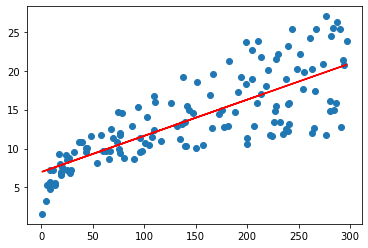

In [81]:
plt.scatter(x_train, y_train)
plt.plot(x_train, 6.9897 + 0.0465*x_train, 'r')
plt.show()

In [83]:
# evaluation

y_train_pred = lnr.predict(x_train_sm)
resid = (y_train - y_train_pred)

<Figure size 432x288 with 0 Axes>

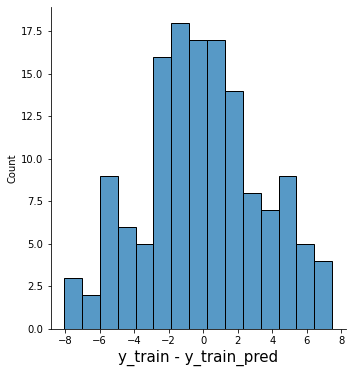

In [84]:
fig = plt.figure()
sns.displot(resid, bins = 15)
fig.suptitle('Error Terms', fontsize=15)
plt.xlabel('y_train - y_train_pred', fontsize = 15)
plt.show()

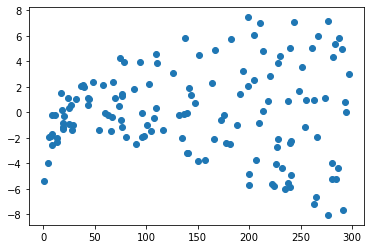

In [86]:
plt.scatter(x_train, resid)
plt.show()

In [87]:
# Prediction on test data

x_test_sm = sm.add_constant(x_test)
y_pred = lnr.predict(x_test_sm)

In [88]:
y_pred.head()

126     7.352345
104    18.065337
99     13.276109
92     17.112141
111    18.228077
dtype: float64

In [89]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [90]:
np.sqrt(mean_squared_error(y_test, y_pred))

2.8241456288327016

In [92]:
#checking r-squared value on the test data
r_sq = r2_score(y_test, y_pred)

In [93]:
r_sq

0.59429872677833

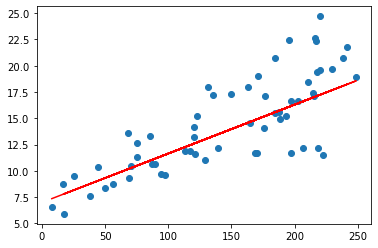

In [94]:
#visualizing the fit on test set

plt.scatter(x_test, y_test)
plt.plot(x_test, 6.9897 + 0.0465*x_test, 'r')
plt.show()